### Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
!pip install chaid
!pip install orca
!pip install graphviz

In [6]:
from CHAID import Tree

### Load data

In [2]:
%cd /content/drive/MyDrive/python_for_business_and_finance/chaid

df = pd.read_csv('resumenames.csv')
df.head()

/content/drive/MyDrive/python_for_business_and_finance/chaid


,Unnamed: 0,name,gender,ethnicity,quality,call,city,jobs,experience,honors,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,1,Allison,female,cauc,low,no,chicago,2,6,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,2,Kristen,female,cauc,high,no,chicago,3,6,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,3,Lakisha,female,afam,low,no,chicago,1,6,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,4,Latonya,female,afam,high,no,chicago,4,6,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,5,Carrie,female,cauc,high,no,chicago,3,22,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


### Data cleaning and preparation

In [3]:
# Drop Unnamed: 0 column
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
# Drop name column
df.drop(columns = ['name'], inplace = True)

In [8]:
# Find unique values
df.nunique()

gender           2
ethnicity        2
quality          2
call             2
city             2
jobs             7
experience      26
honors           2
volunteer        2
military         2
holes            2
school           2
email            2
computer         2
special          2
college          2
minimum         13
equal            2
wanted           6
requirements     2
reqexp           2
reqcomm          2
reqeduc          2
reqcomp          2
reqorg           2
industry         7
dtype: int64

In [9]:
# Check which features are numerical (need to bin them)
df.dtypes

gender          object
ethnicity       object
quality         object
call            object
city            object
jobs             int64
experience       int64
honors          object
volunteer       object
military        object
holes           object
school          object
email           object
computer        object
special         object
college         object
minimum         object
equal           object
wanted          object
requirements    object
reqexp          object
reqcomm         object
reqeduc         object
reqcomp         object
reqorg          object
industry        object
dtype: object

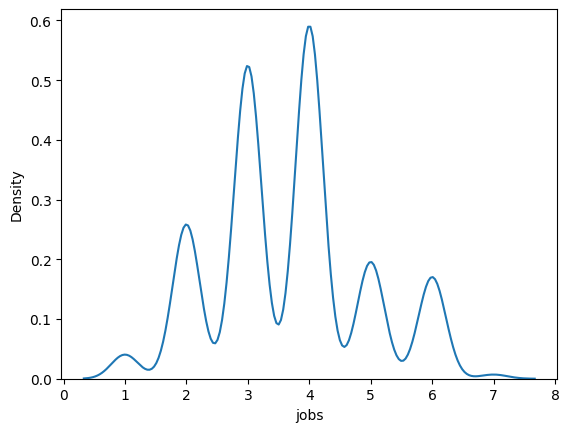

In [11]:
# Visualize numeric variables (to find best binning)
sns.kdeplot(df['jobs'])
plt.show()

In [12]:
# Transform jobs variable
df['jobs'] = pd.cut(df['jobs'], bins = [-1, 2.9, 4.9, 9], labels = [0, 1, 2])
df['jobs']

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [14]:
# Factorizing
df['jobs'] = pd.factorize(df['jobs'])[0]
df['jobs']

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: int64

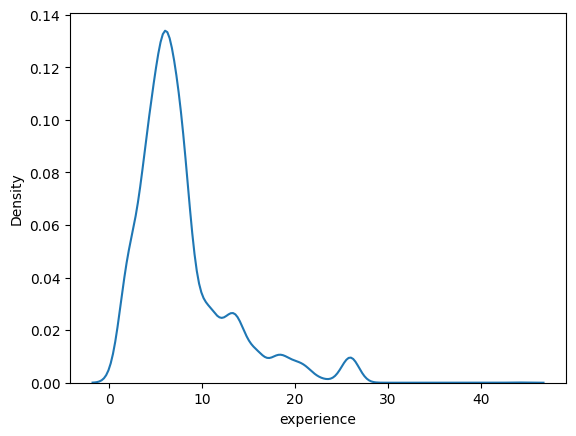

In [15]:
# Visualize experience
sns.kdeplot(df['experience'])
plt.show()

In [16]:
# Transform experience variable
df['experience'] = pd.qcut(df['experience'], q = 3, labels = [0, 1, 2])

# Factorizing
df['experience'] = pd.factorize(df['experience'])[0]
df['experience']

0       0
1       0
2       0
3       0
4       1
       ..
4865    2
4866    0
4867    0
4868    2
4869    0
Name: experience, Length: 4870, dtype: int64

In [17]:
# Exploring minimum variable
df['minimum'].value_counts() # bucket people into 4 experience classes

none    2746
some    1064
2        356
3        331
5        163
1        142
10        18
7         12
8         10
0.5        8
4          8
6          8
0          4
Name: minimum, dtype: int64

In [18]:
# Transform minimum variable
replacement_dict = { 'none': 0,
                    '0': 0,
                     '0.5': 0,
                     '1': 1,
                     '2': 1,
                     'some': 2,
                     '3': 2,
                     '4': 2,
                     '5': 3,
                     '6': 3,
                     '7': 3,
                     '8': 3,
                     '10': 3

}

df['minimum'] = df['minimum'].replace(replacement_dict)
df['minimum']

0       3
1       3
2       3
3       3
4       2
       ..
4865    0
4866    0
4867    0
4868    0
4869    0
Name: minimum, Length: 4870, dtype: int64

In [19]:
# Transform remaining variables
df = pd.get_dummies(df, drop_first = True)
df.head()

,jobs,experience,minimum,gender_male,ethnicity_cauc,quality_low,call_yes,city_chicago,honors_yes,volunteer_yes,...,reqcomm_yes,reqeduc_yes,reqcomp_yes,reqorg_yes,industry_finance/insurance/real estate,industry_health/education/social services,industry_manufacturing,industry_trade,industry_transport/communication,industry_unknown
0,0,0,3,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,3,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,3,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,3,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,1,2,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0


### CHAID model

In [20]:
# get x and y names
y_name = 'call_yes'
X_names = df.drop(columns = ['call_yes']).columns
print(X_names)

Index(['jobs', 'experience', 'minimum', 'gender_male', 'ethnicity_cauc',
       'quality_low', 'city_chicago', 'honors_yes', 'volunteer_yes',
       'military_yes', 'holes_yes', 'school_yes', 'email_yes', 'computer_yes',
       'special_yes', 'college_yes', 'equal_yes', 'wanted_office support',
       'wanted_other', 'wanted_retail sales', 'wanted_secretary',
       'wanted_supervisor', 'requirements_yes', 'reqexp_yes', 'reqcomm_yes',
       'reqeduc_yes', 'reqcomp_yes', 'reqorg_yes',
       'industry_finance/insurance/real estate',
       'industry_health/education/social services', 'industry_manufacturing',
       'industry_trade', 'industry_transport/communication',
       'industry_unknown'],
      dtype='object')


In [25]:
# Create dict indicating which variables are ordinal and wich are nominal
d = dict(zip(X_names, ['ordinal']*3 + ['nominal']*31))
d

{'jobs': 'ordinal',
 'experience': 'ordinal',
 'minimum': 'ordinal',
 'gender_male': 'nominal',
 'ethnicity_cauc': 'nominal',
 'quality_low': 'nominal',
 'city_chicago': 'nominal',
 'honors_yes': 'nominal',
 'volunteer_yes': 'nominal',
 'military_yes': 'nominal',
 'holes_yes': 'nominal',
 'school_yes': 'nominal',
 'email_yes': 'nominal',
 'computer_yes': 'nominal',
 'special_yes': 'nominal',
 'college_yes': 'nominal',
 'equal_yes': 'nominal',
 'wanted_office support': 'nominal',
 'wanted_other': 'nominal',
 'wanted_retail sales': 'nominal',
 'wanted_secretary': 'nominal',
 'wanted_supervisor': 'nominal',
 'requirements_yes': 'nominal',
 'reqexp_yes': 'nominal',
 'reqcomm_yes': 'nominal',
 'reqeduc_yes': 'nominal',
 'reqcomp_yes': 'nominal',
 'reqorg_yes': 'nominal',
 'industry_finance/insurance/real estate': 'nominal',
 'industry_health/education/social services': 'nominal',
 'industry_manufacturing': 'nominal',
 'industry_trade': 'nominal',
 'industry_transport/communication': 'nomina

In [26]:
# Create CHAID tree
model = Tree.from_pandas_df(df, d, y_name, max_depth = 3, min_child_node_size = 250)

### Visualization

In [27]:
import orca
import plotly
import plotly.graph_objects as go

In [ ]:
model.render(path = None,
             view = None)